Source of inspiration and images 
<br>
https://www.khanacademy.org/math/multivariable-calculus/multivariable-derivatives/jacobian/v/computing-a-jacobian-matrix

In [332]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation

### Linear transformation

Lets start with defining our original grid

In [86]:
# Define original matrix
range_of_values = np.arange(-10,11,1)
vertical_lines = []
for x_index in range_of_values:
    tmp_list = []
    for y_index in range_of_values:
        tmp_list.append(np.array([x_index, y_index]))
    vertical_lines.append(tmp_list)
vertical_lines = np.array(vertical_lines)

horizontal_lines = []
for y_index in range_of_values:
    tmp_list = []
    for x_index in range_of_values:
        tmp_list.append(np.array([x_index, y_index]))
    horizontal_lines.append(tmp_list)
horizontal_lines = np.array(horizontal_lines)

And visualize that grid

<IPython.core.display.Javascript object>


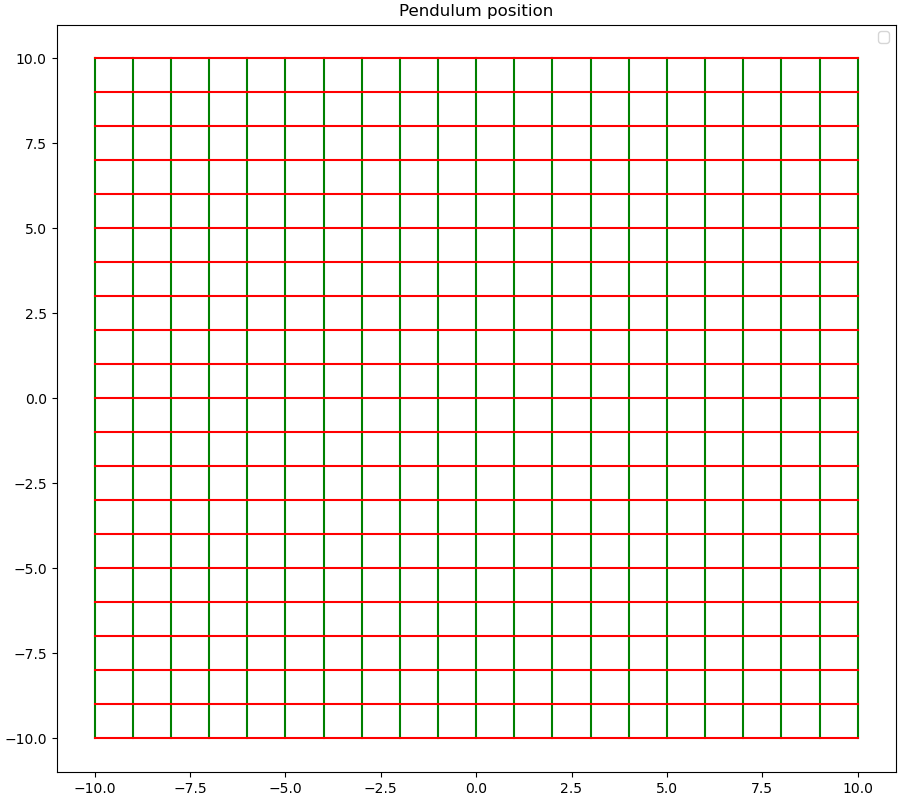

No handles with labels found to put in legend.


In [90]:
%matplotlib notebook
#fig, ax = plt.subplots(figsize = (8,6))
# Plot Animation
fig_of_plot, axes = plt.subplots(constrained_layout=True, figsize=(9,8))
#axes.grid(visible=True)
axes.set_title('Pendulum position')


for vertical_line in vertical_lines:
    vertical_lines_plot, = axes.plot(vertical_line[:,0], vertical_line[:,1], 'g-')
for horizontal_line in horizontal_lines:
    horizontal_lines_plot, = axes.plot(horizontal_line[:,0], horizontal_line[:,1], 'r-')


plt.legend()
plt.show()

Lets define our transformation matrix

In [436]:
transformation_matrix = np.array([[2,-3], [1,1]])
starting_position = np.array([[1,0], [0,1]])

Matematicaly our transformation will look like 
<img src="images/transformation.png"  width = 800 height=300 />

In [467]:
number_of_steps = 50

transformation_matrix_steps_arr = np.zeros(shape = ([number_of_steps+1]+list(starting_position.shape)))

for x_id in range(0,2):
    for y_id in range(0,2):
        print(f"x_{x_id}_y_{y_id}")
        step = abs(max(starting_position[x_id,y_id], transformation_matrix[x_id,y_id])
                   -min(starting_position[x_id,y_id], transformation_matrix[x_id,y_id]))/(number_of_steps)
        if step > 0:
            if transformation_matrix[x_id,y_id] == starting_position[x_id,y_id]:
                curr_coor = np.ones(number_of_steps + 1)
                curr_coor = starting_position[x_id,y_id]
            else:
                curr_coor = np.arange(min(starting_position[x_id,y_id], transformation_matrix[x_id,y_id]),
                                          max(starting_position[x_id,y_id], transformation_matrix[x_id,y_id]), 
                                          step)
                if transformation_matrix[x_id,y_id] > starting_position[x_id,y_id]:
                    curr_coor = np.append(curr_coor, [transformation_matrix[x_id,y_id]])
                else: 
                    curr_coor[::-1].sort()
                    curr_coor = np.append([starting_position[x_id,y_id]],curr_coor)
        else:
            curr_coor = np.ones(number_of_steps + 1)
        #print(curr_coor)
        transformation_matrix_steps_arr[:,x_id,y_id] = curr_coor

x_0_y_0
x_0_y_1
x_1_y_0
x_1_y_1


Lets display transformation of only two lines using our transformation matrix

<IPython.core.display.Javascript object>


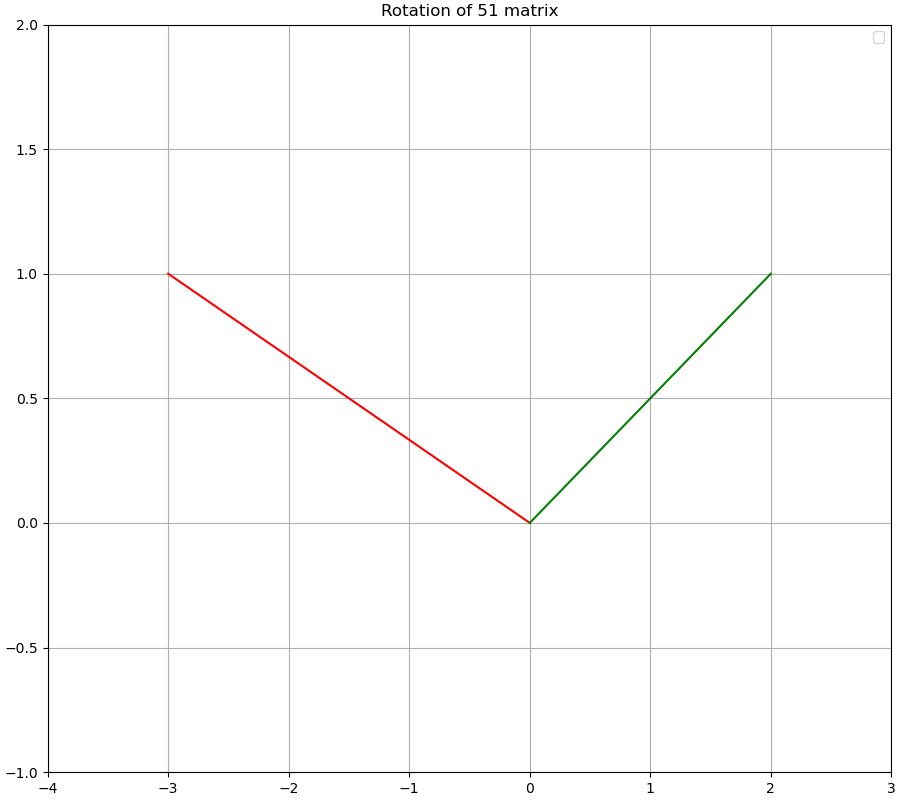

No handles with labels found to put in legend.


In [679]:
%matplotlib notebook
#fig, ax = plt.subplots(figsize = (8,6))
# Plot Animation
fig_of_plot, axes = plt.subplots(constrained_layout=True, figsize=(9,8))
axes.grid(visible=True)
axes.set_xlim([-4,3])
axes.set_ylim([-1,2])

axes.set_title(f"Rotation of {0} matrix")
first_points = np.array([[0,0],[0,1]])
second_points = np.array([[0,1],[0,0]])
first_control_plot,  = axes.plot(first_points[0,:],first_points[1,:], 'r-')
second_control_plot,  = axes.plot(second_points[0,:],second_points[1,:], 'g-')

def update_plot(i):
    axes.set_title(f"Rotation of {i} matrix")
    if i>0:
        first_points_transformed = np.matmul(transformation_matrix_steps_arr[i,:,:], first_points)
        print(first_points_transformed)
        second_points_transformed = np.matmul(transformation_matrix_steps_arr[i,:,:], second_points)
        first_control_plot.set_data(first_points_transformed[0,:], first_points_transformed[1,:])
        second_control_plot.set_data(second_points_transformed[0,:], second_points_transformed[1,:])
    axes.relim()
    axes.autoscale_view()


ani = animation.FuncAnimation(fig_of_plot, update_plot, repeat=False,
                                    frames=number_of_steps+2, interval=500)

plt.legend()
plt.show()

From the graph we can see, that we are rotating and extending the lines. Now, lets apply this on whole space. 

<IPython.core.display.Javascript object>


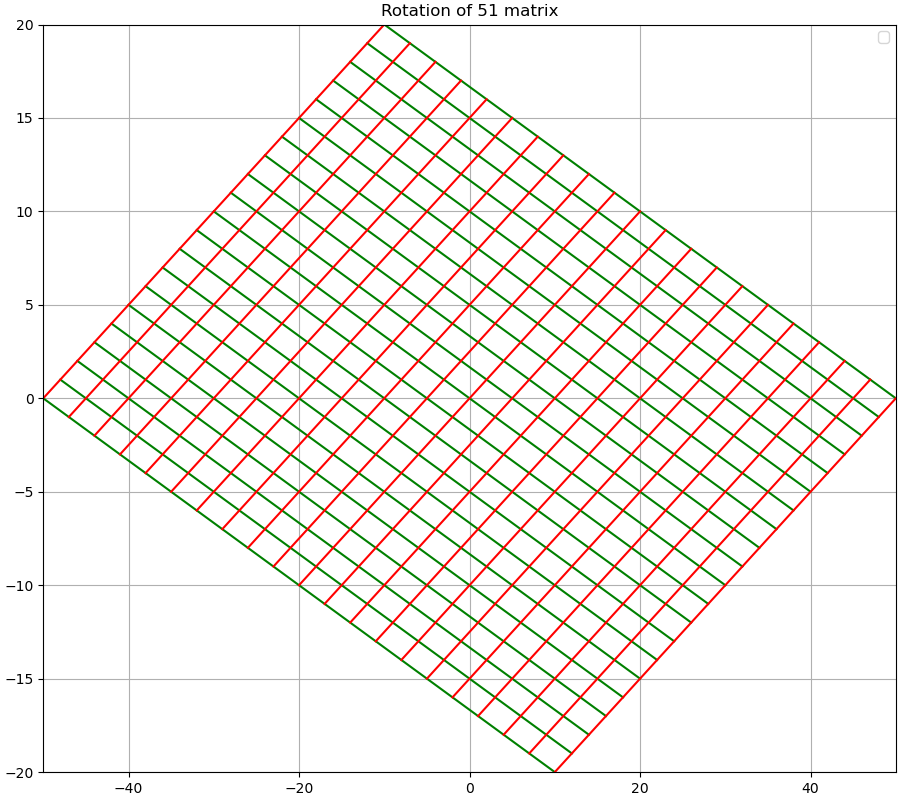

No handles with labels found to put in legend.


In [739]:
%matplotlib notebook
#fig, ax = plt.subplots(figsize = (8,6))
# Plot Animation
fig_of_plot, axes = plt.subplots(constrained_layout=True, figsize=(9,8))
axes.grid(visible=True)
axes.set_xlim([-50,50])
axes.set_ylim([-20,20])

axes.set_title(f"Rotation of {0} matrix")
vertical_lines_plots = []
for vertical_line in vertical_lines:
    vertical_lines_plots.append(axes.plot(vertical_line[:,0], vertical_line[:,1], 'g-')[0])
horizontal_lines_plots = []
for horizontal_line in horizontal_lines:
    horizontal_lines_plots.append(axes.plot(horizontal_line[:,0], horizontal_line[:,1], 'r-')[0])

def update_plot(i):
    axes.set_title(f"Rotation of {i} matrix")
    for vertical_plot_id, _ in enumerate(vertical_lines):
        vertical_line_transformed = np.matmul(transformation_matrix_steps_arr[i,:,:],
              vertical_lines[vertical_plot_id].T)
        vertical_lines_plots[vertical_plot_id].set_data(vertical_line_transformed[0,:],vertical_line_transformed[1,:])
    for horizontal_plot_id, _ in enumerate(horizontal_lines):
        horizontal_line_transformed = np.matmul(transformation_matrix_steps_arr[i,:,:],
                                                horizontal_lines[horizontal_plot_id].T)
        horizontal_lines_plots[horizontal_plot_id].set_data(horizontal_line_transformed[0,:], horizontal_line_transformed[1,:])
    axes.relim()
    axes.autoscale_view()


ani = animation.FuncAnimation(fig_of_plot, update_plot, repeat=False,
                                    frames=number_of_steps+2, interval=500)

plt.legend()
plt.show()

### Non linear transformation

Explain Jacobian matrix is fairly simple. 
<ul>
  <li>Firstly, lets have a look on the left side of the image. If use any kind of nonlinear matrix to adjust space, we see, tha grid id interestingly distorted. On the other hand, if we zoom in, we see, that transformation is somehow linear, therefore, we can approximate linear transformation.</li>
  <li>For linear transformationwee need to have a matrix of partial derivatives. as is on top centra part. We take partial derivative with respect to x in first column and partial derivative with respect to y in second column. Thats an universal formula.</li>
  <li>Then we take nonlinear formula we used for transformation and use partial derivatives to this formula and we he transformation matrix</li>
</ul>
<img src="images/Jacobian_matrix_intro.png"  width = 800 height=300 />

We can also draw more detailed differencies as following

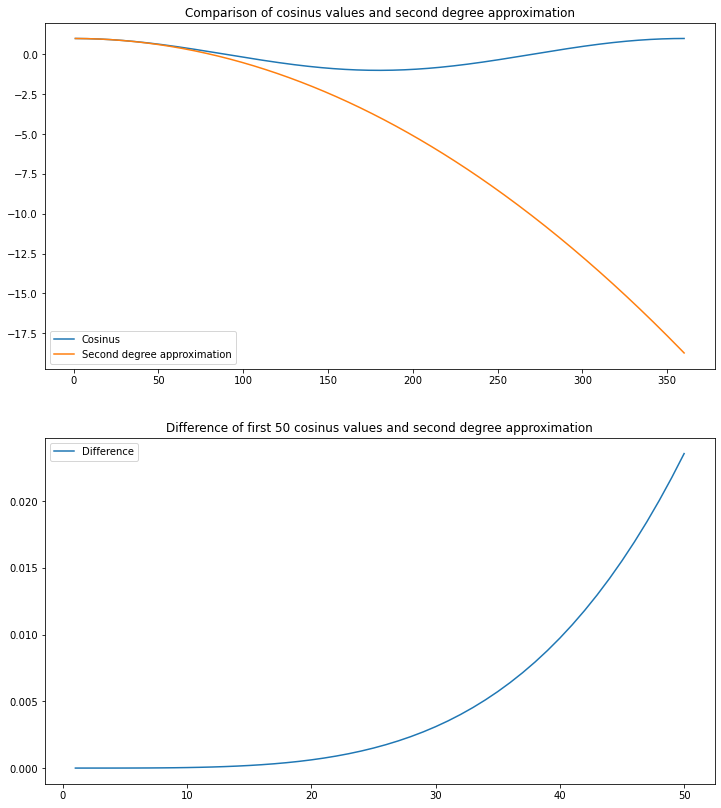

In [31]:
fig, axes = plt.subplots(2, 1, figsize=(12,14))
angles = np.arange(1,361,1)
cosinus_data = np.cos(np.deg2rad(angles))
second_degree_approximation = 1-(np.deg2rad(np.arange(1,361,1))**2/2)
axes[0].plot(angles, cosinus_data, label = "Cosinus")
axes[0].plot(angles, second_degree_approximation, label = "Second degree approximation")
axes[0].legend()
axes[0].set_title("Comparison of cosinus values and second degree approximation")
axes[1].plot(angles[:50], cosinus_data[:50] - second_degree_approximation[:50], label = "Difference")
axes[1].set_title("Difference of first 50 cosinus values and second degree approximation")
axes[1].legend()
plt.show()

If you ask how to derive approximation, lets see it on this current example. We start with completely indefined formula such as here bellow.
<img src="images/Taylor_series_approximation_deriving_initial_formula.png"  width = 800 height=300 />
We have there 3 components. Blue "c0", yellow "c1" and green "c2". Those are parameters we have to find and we do that by derivation of our formula vs. cosinus.
<img src="images/Taylor_series_approximation_deriving.png"  width = 800 height=300 />
Lets start with deriving "c0"
<ul>
  <li>"c0" is a constant. We see, that in case x = 0, then y = 1. Thats the same value we need to get from our approximation and as "c0" is constant, it needs to equal to that number, therefore "c0" must equal to 1</li>
  <li>Lets move to "c1". To compare them, we need to have first degree derivative of our "c1x" and cosinus and this has to equal. Derivative of cos(x) is equal to -sin(0), therefore "c1x" must also equal to 0 and thats happening only in case, when "c1x" is 0.</li>
  <li>Lastly we have "c2x**2". For this we apply same formula, which is second derivates must equal and we get value of 2*(-1/2)</li>
</ul>
So, here we have our final estimation formula P(x).

If we want to derive approximation for a different position, we only make sure, that derivatives will equal by substracting that number 
<img src="images/Taylor_series_approximation_deriving_other_position.png"  width = 800 height=300 />